In [8]:
from scipy.stats import ttest_ind
from sklearn.metrics import roc_auc_score
import statistics
import pandas as pd
import os

In [9]:
df_fram = pd.read_csv(os.path.join('/legodata/zhaoj/cvd_risk_time2/src/exome/results/256,8_.75,.5_fram_pred.csv'))
df_full = pd.read_csv(os.path.join('/legodata/zhaoj/cvd_risk_time2/src/exome/results/256,8_.75,.5_full_pred.csv'))

In [10]:
print(roc_auc_score(df_fram['CLASS'], df_fram['SCORE']))
print(roc_auc_score(df_full['CLASS'], df_full['SCORE']))

0.535265675897
0.53782095042


In [11]:
for df_pred in [df_fram, df_full]:
    avg_auc = 0 
#     df_pred = full_dict[thresh]
    
#     dict_summary['{}_full'.format(thresh)] = list()
    fold_auroc = list() 
    
    for i in range(10): 
        df_pred_fold = df_pred.loc[df_pred['FOLD'] == i]
        roc_auc = roc_auc_score(df_pred_fold['CLASS'], df_pred_fold['SCORE'])
        
#         dict_summary['{}_full'.format(thresh)].append(roc_auc)
        avg_auc += roc_auc 
        fold_auroc.append(roc_auc)
    
    print(avg_auc / 10)
    print(statistics.stdev(fold_auroc))

0.534087548751
0.07338053916291196
0.534950034128
0.05232354743951794


In [12]:
for df_1, df_2 in [(df_fram, df_full)]: 
    auc_dict = {'df_1': [], 'df_2': []} 
    
    df_2_avg = 0 
    df_1_avg = 0 
    
    for i in range(10): 
        
        df_2_fold = df_1.loc[df_1['FOLD'] == i]
        df_1_fold = df_2.loc[df_2['FOLD'] == i] 
        df_1_auc = roc_auc_score(df_1_fold['CLASS'], df_1_fold['SCORE'])
        df_2_auc = roc_auc_score(df_2_fold['CLASS'], df_2_fold['SCORE']) 
        
        df_1_avg += df_1_auc 
        df_2_avg += df_2_auc 
        
        auc_dict['df_1'].append(df_1_auc)
        auc_dict['df_2'].append(df_2_auc) 
        
    df_1_avg /= 10 
    df_2_avg /= 10 
    
    print(df_1_avg)
    print(df_2_avg)
    
    df_auc = pd.DataFrame(auc_dict)
    
    print(ttest_ind(auc_dict['df_1'], auc_dict['df_2']))

0.534950034128
0.534087548751
Ttest_indResult(statistic=0.030262724617837886, pvalue=0.97619055107715802)


fold: 0
fold auc: 0.48853082089176303
best: 0
fold: 1
fold auc: 0.5006369924939614
best: 0
fold: 2
fold auc: 0.518253381164112
best: 0
fold: 3
fold auc: 0.6407567815506823
best: 3
fold: 4
fold auc: 0.5261107266619472
best: 3
fold: 5
fold auc: 0.65693612575995
best: 3
fold: 6
fold auc: 0.5956854198317438
best: 6
fold: 7
fold auc: 0.4522288771698178
best: 6
fold: 8
fold auc: 0.44678163022353723
best: 6
fold: 9
fold auc: 0.5149547317664447
best: 6
6
0.535265675897
0.547368776895
fold: 0
fold auc: 0.5067402942316755
best: 0
fold: 1
fold auc: 0.5272502083579997
best: 0
fold: 2
fold auc: 0.5347757626831403
best: 0
fold: 3
fold auc: 0.6173381845724555
best: 3
fold: 4
fold auc: 0.567688493757631
best: 4
fold: 5
fold auc: 0.6146407283364176
best: 4
fold: 6
fold auc: 0.5404057917475497
best: 6
fold: 7
fold auc: 0.4844925308807624
best: 6
fold: 8
fold auc: 0.46178574623233204
best: 6
fold: 9
fold auc: 0.4943826004769907
best: 6
6
0.53782095042
0.509371685538


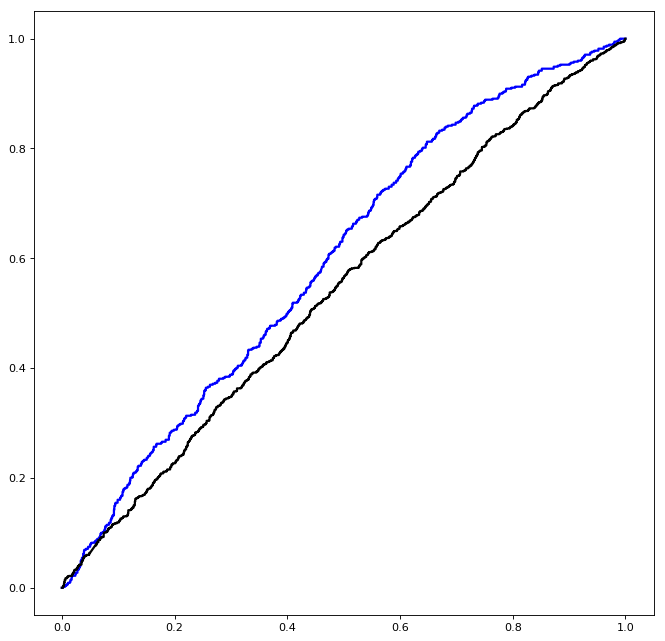

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
lw = 2

color = ['black', 'blue']
for df_pred in [df_fram, df_full]:
    
    overall_auc = roc_auc_score(df_pred['CLASS'], df_pred['SCORE'])
    error = overall_auc
    best = 0 
    
    for i in range(10): 
        print('fold: {}'.format(i))
        df_fold_pred = df_pred.loc[df_pred['FOLD'] == i]
        fold_auc = roc_auc_score(df_fold_pred['CLASS'], df_fold_pred['SCORE']) 
        print('fold auc: {}'.format(fold_auc))
        if (abs(overall_auc-fold_auc) < error) and ((fold_auc-overall_auc) > 0): 
            best = i 
            error = abs(overall_auc-fold_auc) 
        print('best: {}'.format(best))

    df_pred = df_pred[df_pred['FOLD'] == best]
    
    print(best)
    print(overall_auc)
    print(roc_auc_score(df_pred['CLASS'], df_pred['PRED']))
    
    
    
#     n_classes = 2
#     # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(df_pred['CLASS'], df_pred['SCORE'])
        roc_auc[i] = auc(fpr[i], tpr[i])

#     # # Compute micro-average ROC curve and ROC area
#     # fpr["micro"], tpr["micro"], _ = roc_curve(df_pred['PRED'].ravel(), df_pred['SCORE'].ravel())
#     # roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    
    plt.plot(fpr[1], tpr[1], color=color.pop(),  
             lw=lw, label='Fram ROC curve (area = {})'.format(round(roc_auc[1], 3)))


# n_classes = 2
# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(df_pred_2['CLASS'], df_pred_2['SCORE'])
#     roc_auc[i] = auc(fpr[i], tpr[i])
    
# plt.plot(fpr[1], tpr[1], color='green', linestyle='--', 
#          lw=lw, label='Full ROC curve (area = {})'.format(round(roc_auc[1], 3)))
    
# plt.plot([0, 1], [0, 1], color='darkblue', lw=lw, linestyle='-.')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
plt.show()

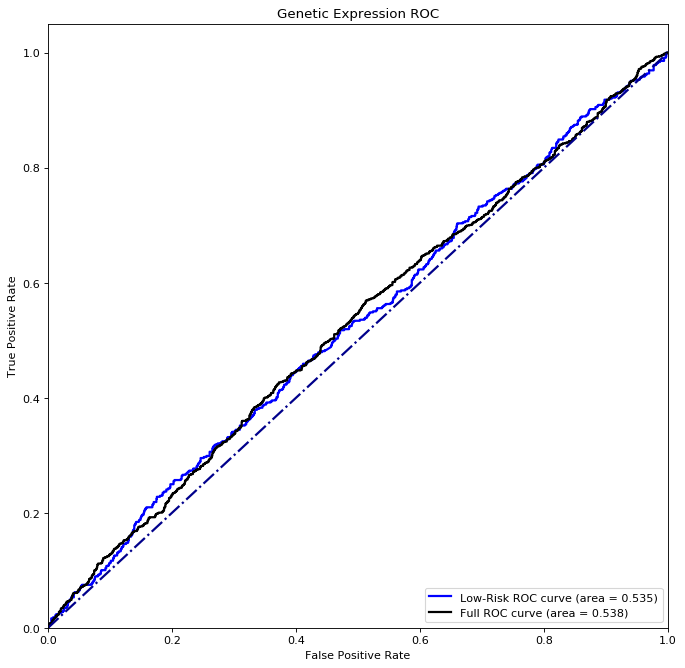

In [56]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
lw = 2

df_fram_fold = df_fram.loc[df_fram['FOLD'] == 4]
df_full_fold = df_full.loc[df_full['FOLD'] == 1]

color = ['black', 'blue']
auroc = [roc_auc_score(df_full['CLASS'], df_full['SCORE']), roc_auc_score(df_fram['CLASS'], df_fram['SCORE'])]
order = ['Full', 'Low-Risk']

for df_pred in (df_fram_fold, df_full_fold): 
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(df_pred['CLASS'], df_pred['SCORE'])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #     # # Compute micro-average ROC curve and ROC area
    #     # fpr["micro"], tpr["micro"], _ = roc_curve(df_pred['PRED'].ravel(), df_pred['SCORE'].ravel())
    #     # roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    plt.plot(fpr[1], tpr[1], color=color.pop(),  
             lw=lw, label='{} ROC curve (area = {})'.format(order.pop(),round(auroc.pop(), 3)))
    
        
plt.plot([0, 1], [0, 1], color='darkblue', lw=lw, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Genetic Expression ROC')
plt.legend(loc="lower right")

plt.show()

In [59]:
print(len(df_fram.loc[df_fram['CLASS'] == 1]))

5489


In [61]:
print(len(df_full.loc[df_full['CLASS'] == 1]))

12533


In [62]:
print(len(df_full))

26272


In [63]:
print(len(df_full.columns))

4


In [8]:
for full, fram in [(gbt_full, gbt_true_fram), (lr_full, lr_true_fram), (rf_full, rf_true_fram)]: 
    auc_dict = {'full': [], 'fram': []} 
    
    fram_avg = 0 
    full_avg = 0 
    
    for i in range(10): 
        fram_fold = full.loc[full['FOLD'] == i]
        full_fold = fram.loc[fram['FOLD'] == i] 
        full_auc = roc_auc_score(full_fold['CLASS'], full_fold['SCORE'])
        fram_auc = roc_auc_score(fram_fold['CLASS'], fram_fold['SCORE']) 
        
        full_avg += full_auc 
        fram_avg += fram_auc 
        
        auc_dict['full'].append(full_auc)
        auc_dict['fram'].append(fram_auc) 
        
    full_avg /= 10 
    fram_avg /= 10 
    
    print(full_avg)
    print(fram_avg)
    
    df_auc = pd.DataFrame(auc_dict)
    
    print(ttest_ind(auc_dict['full'], auc_dict['fram']))

NameError: name 'gbt_full' is not defined